# Machine Learning Intermediate Project using Voice Dataset

## Table of Contents

1. [Description](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [Data Pre-Processing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Feature Engineering](#section6)<br>
7. [Model Development & Evaluation](#section7)<br>
8. [Model Comparison](#section8)<br>
9. [Conclusion](#section9)<br>

<a id=section1></a>

## 1. Description

### Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

### The Dataset

The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

<a id=section2></a>

## 2. Problem Statement

This project is to practice & implement Machine Learning Concepts learned till now. The notebook has observations with each step in order to explain thoroughly how to approach the data set.

The ultimate goal would be to develop a model to recognize gender using voice. As the target variable is Gender (M/F), I would be using classification algorithms and also evaluate the models using possible __Model Evaluation Techniques__.

Dataset Source : https://github.com/insaid2018/Term-3/tree/master/Projects

The **target feature** in the acquired data set is **label**.

|Target Feature|Potential Values|
| :-- | :-- |
|label|0: Female|
||1: Male|

Confusion Matrix for this Dataset

- How many female voices we predict as female voices (TN = True Negative)
- How many female voices we predict as male voices (FP = False Positive)
- How many male voices we predict as female voices (FN = False Negative)
- How many male voices we predict as male voices (TP = True Positive)

In this Dataset, Reducing False Positives & False Negatives are Equally Important. Hence __Precision__ & __Recall__ Scores should have Same Weightage.

<a id=section3></a>

## 3. Data Loading and Description

### Import Packages

In [123]:
#Import Required Packages for EDA
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# To apply seaborn whitegrid style to the plots.
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# To adjust seaborn settings for the plots.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#Multiple Prints in same Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Models Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Pre-Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load Data

In [2]:
df_voice = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Check the shape of the dataset

In [3]:
df_voice.shape

(3168, 21)

### Check the columns

In [4]:
df_voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

### Check the descriptive statistics of the dataset

In [5]:
df_voice.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


### Check the info of the dataset

In [6]:
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

### Check if there are any null values present

In [7]:
df_voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### For Visualization if Missing Values are Present

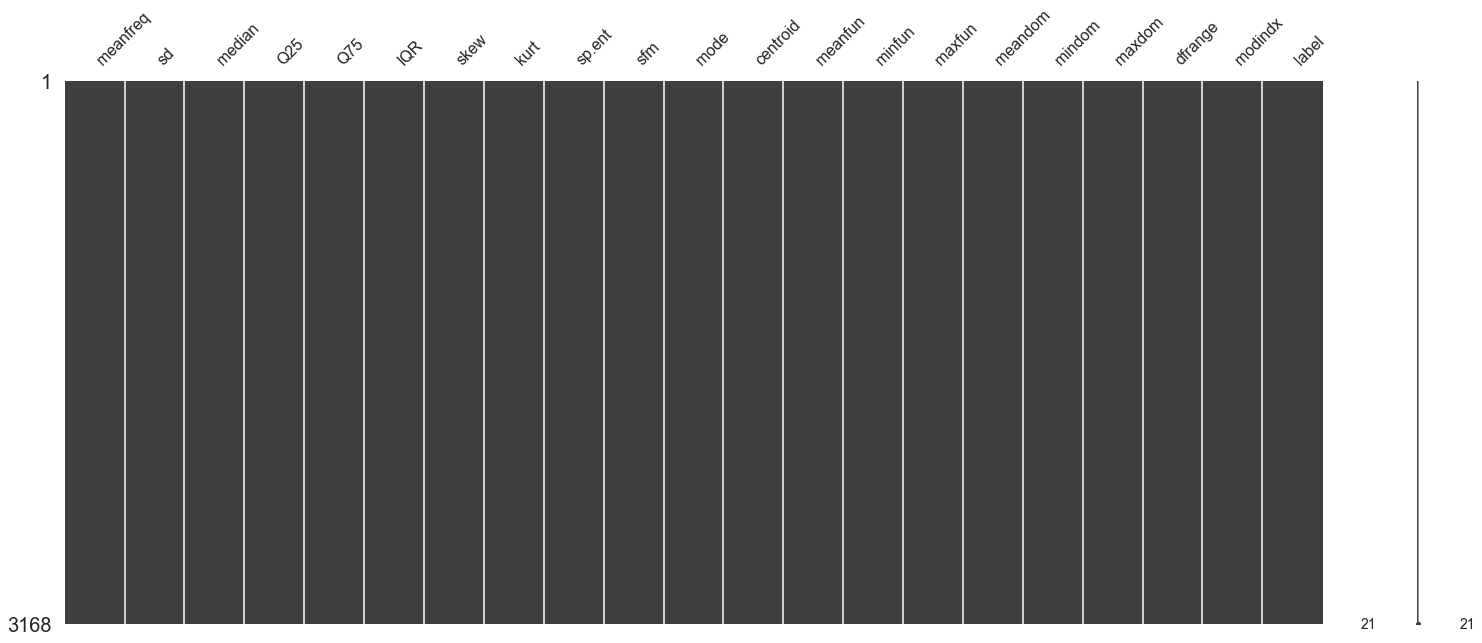

In [8]:
msno.matrix(df_voice)

__Inference:__
- No Missing Values in any of the Features

### Pandas Profiling Before Data Pre-Processing

In [9]:
#Create Profiling Report
profile = ProfileReport(df_voice,title='Pandas Profiling Report',html={'style':{'full_width':True}})
profile.to_file(output_file='Voice_Dataset_Report.html')

#### Observations:
- 2 Duplicated Rows

<a id=section4></a>

## 4. Data Pre-Processing

### Get Duplicated Rows

In [10]:
duplicateRows = df_voice[df_voice.duplicated(keep=False)]
duplicateRows

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
232,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2393,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


### Remove Duplicated Rows

In [11]:
#Create Copy of Original DataFrame to Work on
df1 = df_voice.drop_duplicates(keep='first')

### Confirm by checking shape to ensure Duplicated Rows are removed

In [12]:
df1.shape

(3166, 21)

### Pandas Profiling After Data Pre-Processing

In [14]:
#Create Post-Profiling Report
post_profile = ProfileReport(df1,title='Pandas Post Profiling Report',html={'style':{'full_width':True}})
post_profile.to_file(output_file='Voice_Dataset_Post_Report.html')

#### Observations:
- Duplicated Rows are Removed and are Not Present Anymore as confirmed from Pandas Profiling Report

<a id=section5></a>

## 5. Exploratory Data Analysis

### Univariate Analysis

#### Plot Histogram for All Independent Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002509C117A48>,
      dtype=object)

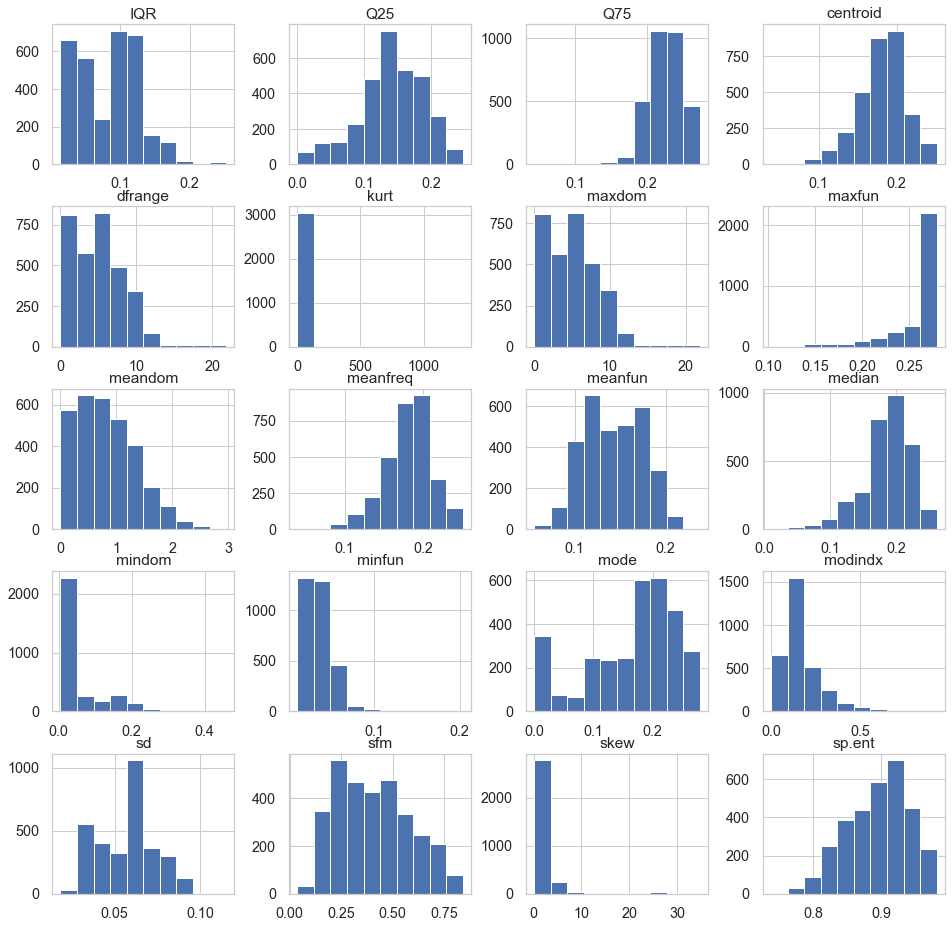

In [15]:
df1.hist(figsize=(16,16))

#### Inference:
- Visually most of the Features which includes IQR, Q75, dfrange, kurt, skew, maxdom, meandom, mindom, meanfreq, maxfun, minfun and modindx are Skewed

#### Define Function for Calculation of Quartiles & Range for Detection of Outliers in Feature

In [16]:
def calc_range(df, feature):
    q1, q3 = df[feature].quantile([0.25,0.75])
    iqr = q3 - q1
    #Using Standard 1.5 IQR Rule for Range on Either Sides
    rang = 1.5 * iqr
    return (q1-rang, q3+rang)

#### Define Function for Calculating No. of Outliers Present in a Feature

In [17]:
def calc_outliers(df, feature):
    lower, upper = calc_range(df, feature)
    print("Lower Value for Outlier Detection : %.4f" % lower)
    print("Upper Value for Outlier Detection : %.4f" % upper)
    no_outliers = [df[feature] for i in df[feature] if i<lower or i>upper]
    print("Total No. of Samples : ", len(df[feature]))
    print("Total No. of Outliers : ", len(no_outliers))
    print("Total No. of Samples Remaining if Outliers are Removed : ", len(df[feature])-len(no_outliers))

#### Define Function for Plotting BoxPlot & KDE Plot for a Feature

In [18]:
def plot_feature(df, feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(df[feature], ax=axes[0])
    sns.distplot(df[feature], ax=axes[1], color='red')
    fig.set_size_inches(15,5)

#### Analyze Individual Features

Lower Value for Outlier Detection : 0.1104
Upper Value for Outlier Detection : 0.2523
Total No. of Samples :  3166
Total No. of Outliers :  64
Total No. of Samples Remaining if Outliers are Removed :  3102


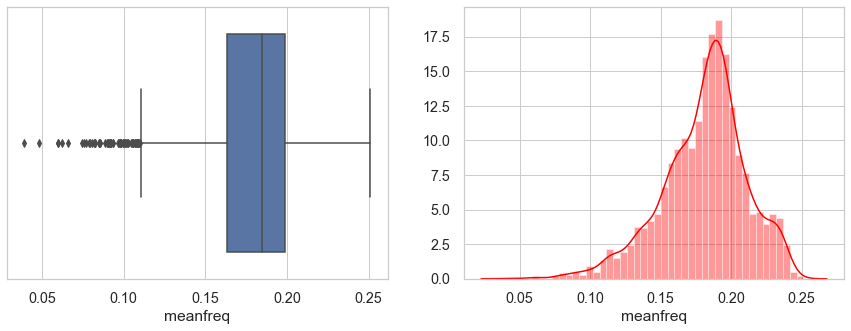

In [19]:
plot_feature(df1, 'meanfreq')
calc_outliers(df1, 'meanfreq')

#### Inference for meanfreq
- We can see that all values in the above plots are matching with describe function used earlier
- Distribution is Negatively Skewed as seen in Histogram Earlier.
- Outliers are Present in Left Tail Distribution Below Q1
- After Removing Outliers, we would have around 3102 Samples

##### Similiarly other Features can be Inferenced

Lower Value for Outlier Detection : 0.0043
Upper Value for Outlier Detection : 0.1046
Total No. of Samples :  3166
Total No. of Outliers :  10
Total No. of Samples Remaining if Outliers are Removed :  3156


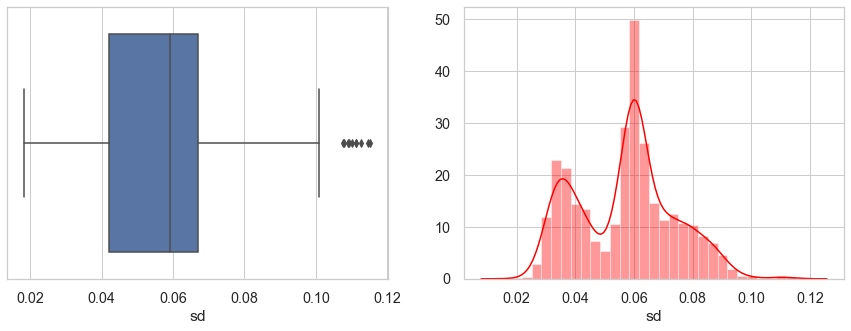

In [20]:
plot_feature(df1, 'sd')
calc_outliers(df1,'sd')

Lower Value for Outlier Detection : 0.1081
Upper Value for Outlier Detection : 0.2721
Total No. of Samples :  3166
Total No. of Outliers :  109
Total No. of Samples Remaining if Outliers are Removed :  3057


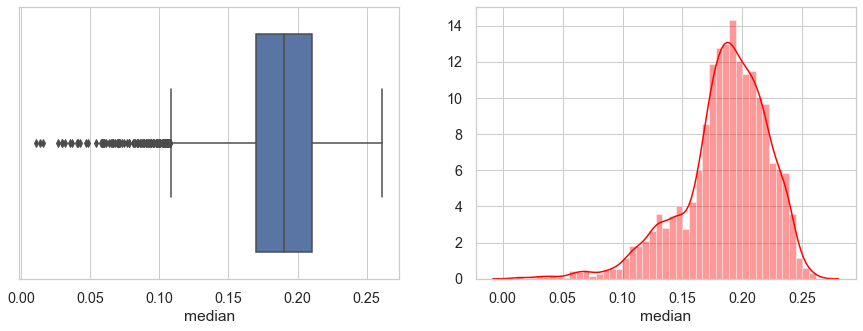

In [21]:
plot_feature(df1, 'median')
calc_outliers(df1, 'median')

Lower Value for Outlier Detection : 0.0138
Upper Value for Outlier Detection : 0.2732
Total No. of Samples :  3166
Total No. of Outliers :  33
Total No. of Samples Remaining if Outliers are Removed :  3133


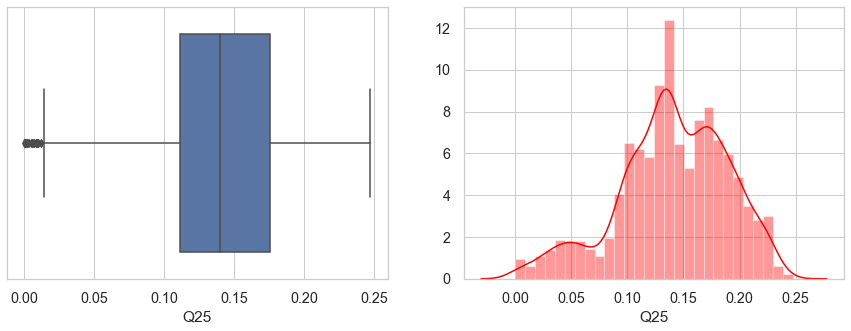

In [22]:
plot_feature(df1, 'Q25')
calc_outliers(df1, 'Q25')

Lower Value for Outlier Detection : 0.1564
Upper Value for Outlier Detection : 0.2960
Total No. of Samples :  3166
Total No. of Outliers :  27
Total No. of Samples Remaining if Outliers are Removed :  3139


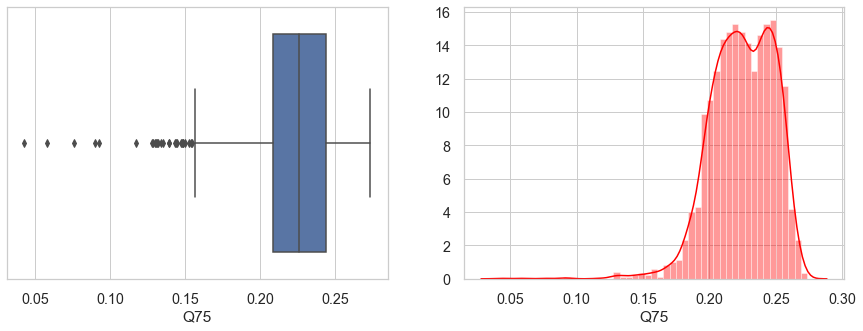

In [23]:
plot_feature(df1, 'Q75')
calc_outliers(df1, 'Q75')

Lower Value for Outlier Detection : -0.0649
Upper Value for Outlier Detection : 0.2216
Total No. of Samples :  3166
Total No. of Outliers :  10
Total No. of Samples Remaining if Outliers are Removed :  3156


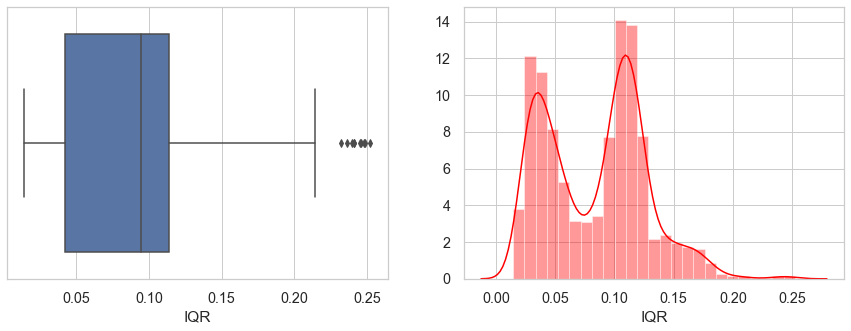

In [24]:
plot_feature(df1, 'IQR')
calc_outliers(df1, 'IQR')

Lower Value for Outlier Detection : -0.2754
Upper Value for Outlier Detection : 4.8573
Total No. of Samples :  3166
Total No. of Outliers :  230
Total No. of Samples Remaining if Outliers are Removed :  2936


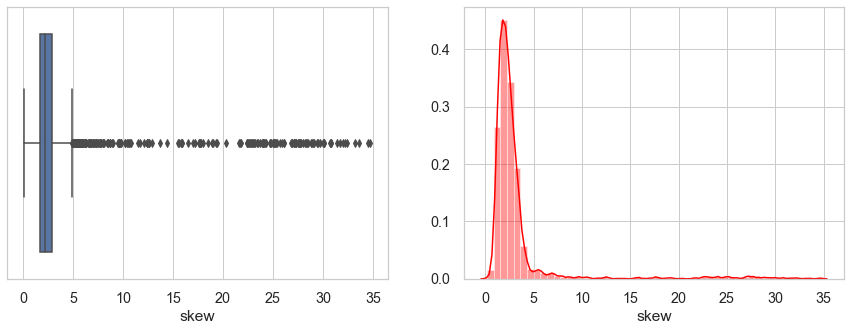

In [25]:
plot_feature(df1, 'skew')
calc_outliers(df1, 'skew')

Lower Value for Outlier Detection : -6.3077
Upper Value for Outlier Detection : 25.6243
Total No. of Samples :  3166
Total No. of Outliers :  332
Total No. of Samples Remaining if Outliers are Removed :  2834


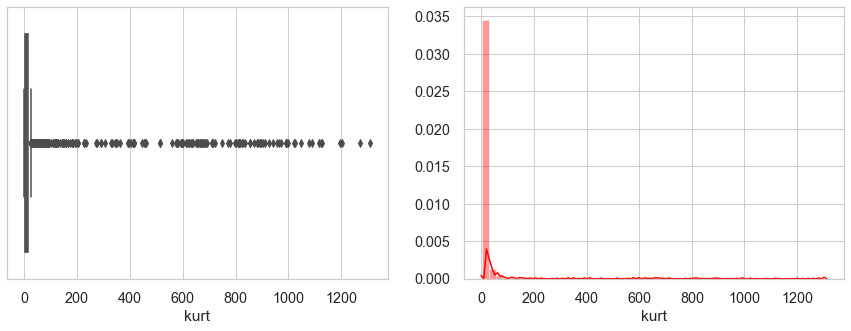

In [26]:
plot_feature(df1, 'kurt')
calc_outliers(df1, 'kurt')

Lower Value for Outlier Detection : 0.7615
Upper Value for Outlier Detection : 1.0291
Total No. of Samples :  3166
Total No. of Outliers :  6
Total No. of Samples Remaining if Outliers are Removed :  3160


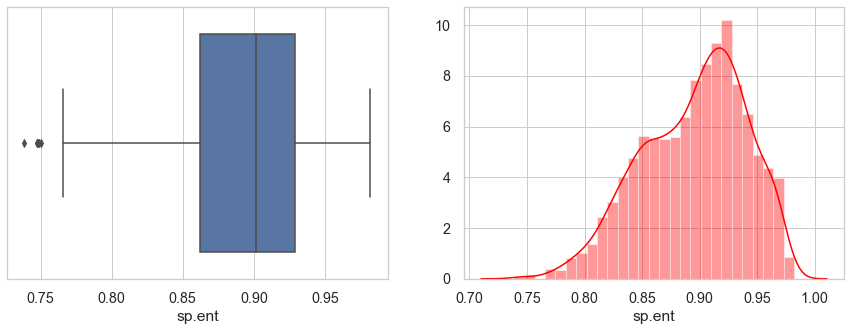

In [27]:
plot_feature(df1, 'sp.ent')
calc_outliers(df1, 'sp.ent')

Lower Value for Outlier Detection : -0.1554
Upper Value for Outlier Detection : 0.9473
Total No. of Samples :  3166
Total No. of Outliers :  0
Total No. of Samples Remaining if Outliers are Removed :  3166


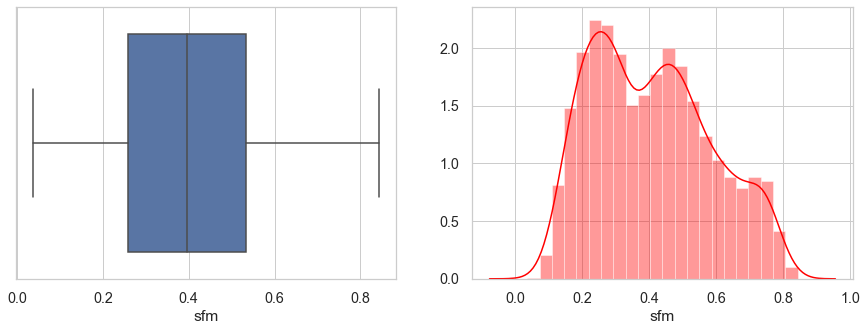

In [28]:
plot_feature(df1, 'sfm')
calc_outliers(df1, 'sfm')

Lower Value for Outlier Detection : -0.0366
Upper Value for Outlier Detection : 0.3757
Total No. of Samples :  3166
Total No. of Outliers :  0
Total No. of Samples Remaining if Outliers are Removed :  3166


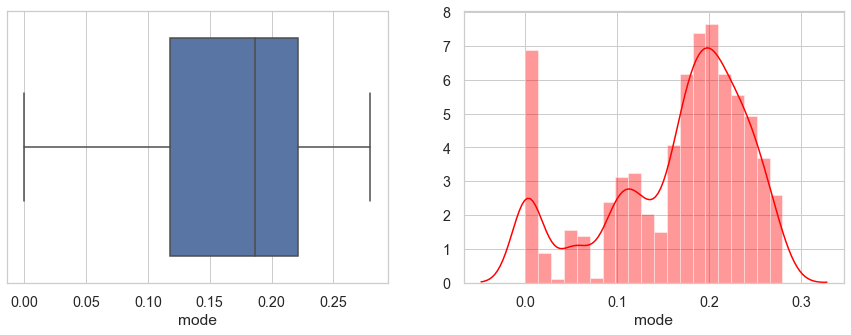

In [29]:
plot_feature(df1, 'mode')
calc_outliers(df1, 'mode')

Lower Value for Outlier Detection : 0.0381
Upper Value for Outlier Detection : 0.2485
Total No. of Samples :  3166
Total No. of Outliers :  0
Total No. of Samples Remaining if Outliers are Removed :  3166


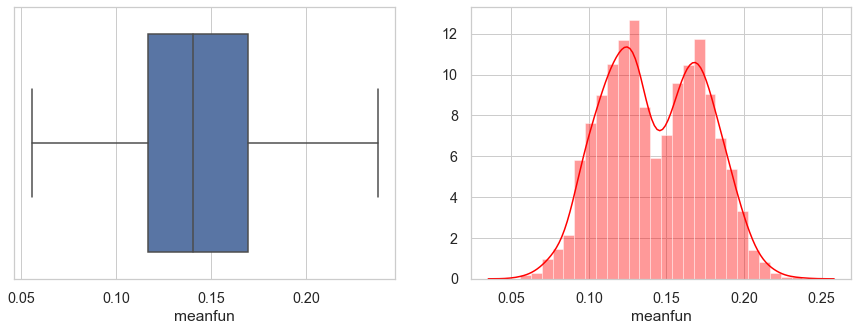

In [30]:
plot_feature(df1, 'meanfun')
calc_outliers(df1, 'meanfun')

#### Distribution of Target Variable

Text(0, 0.5, 'Gender')

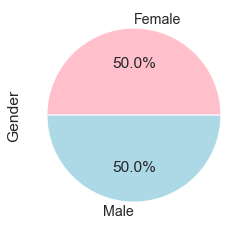

In [31]:
df1['label'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['pink','lightblue'],labels=['Female','Male'])
plt.ylabel('Gender')

In [32]:
df1['label'].value_counts()

male      1583
female    1583
Name: label, dtype: int64

__Inference__:
- Dataset is Balanced as there are Equal No. of Records (i.e. 1583) for both Male & Female

### Bivariate Analysis

#### Distribution of Target Variable in All Features

(<Figure size 1584x1584 with 20 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002509F5B2488>,
       dtype=object))

Text(0.5, 1.0, 'meanfreq')

Text(0.5, 1.0, 'sd')

Text(0.5, 1.0, 'median')

Text(0.5, 1.0, 'Q25')

Text(0.5, 1.0, 'Q75')

Text(0.5, 1.0, 'IQR')

Text(0.5, 1.0, 'skew')

Text(0.5, 1.0, 'kurt')

Text(0.5, 1.0, 'sp.ent')

Text(0.5, 1.0, 'sfm')

Text(0.5, 1.0, 'mode')

Text(0.5, 1.0, 'centroid')

Text(0.5, 1.0, 'meanfun')

Text(0.5, 1.0, 'minfun')

Text(0.5, 1.0, 'maxfun')

Text(0.5, 1.0, 'meandom')

Text(0.5, 1.0, 'mindom')

Text(0.5, 1.0, 'maxdom')

Text(0.5, 1.0, 'dfrange')

Text(0.5, 1.0, 'modindx')

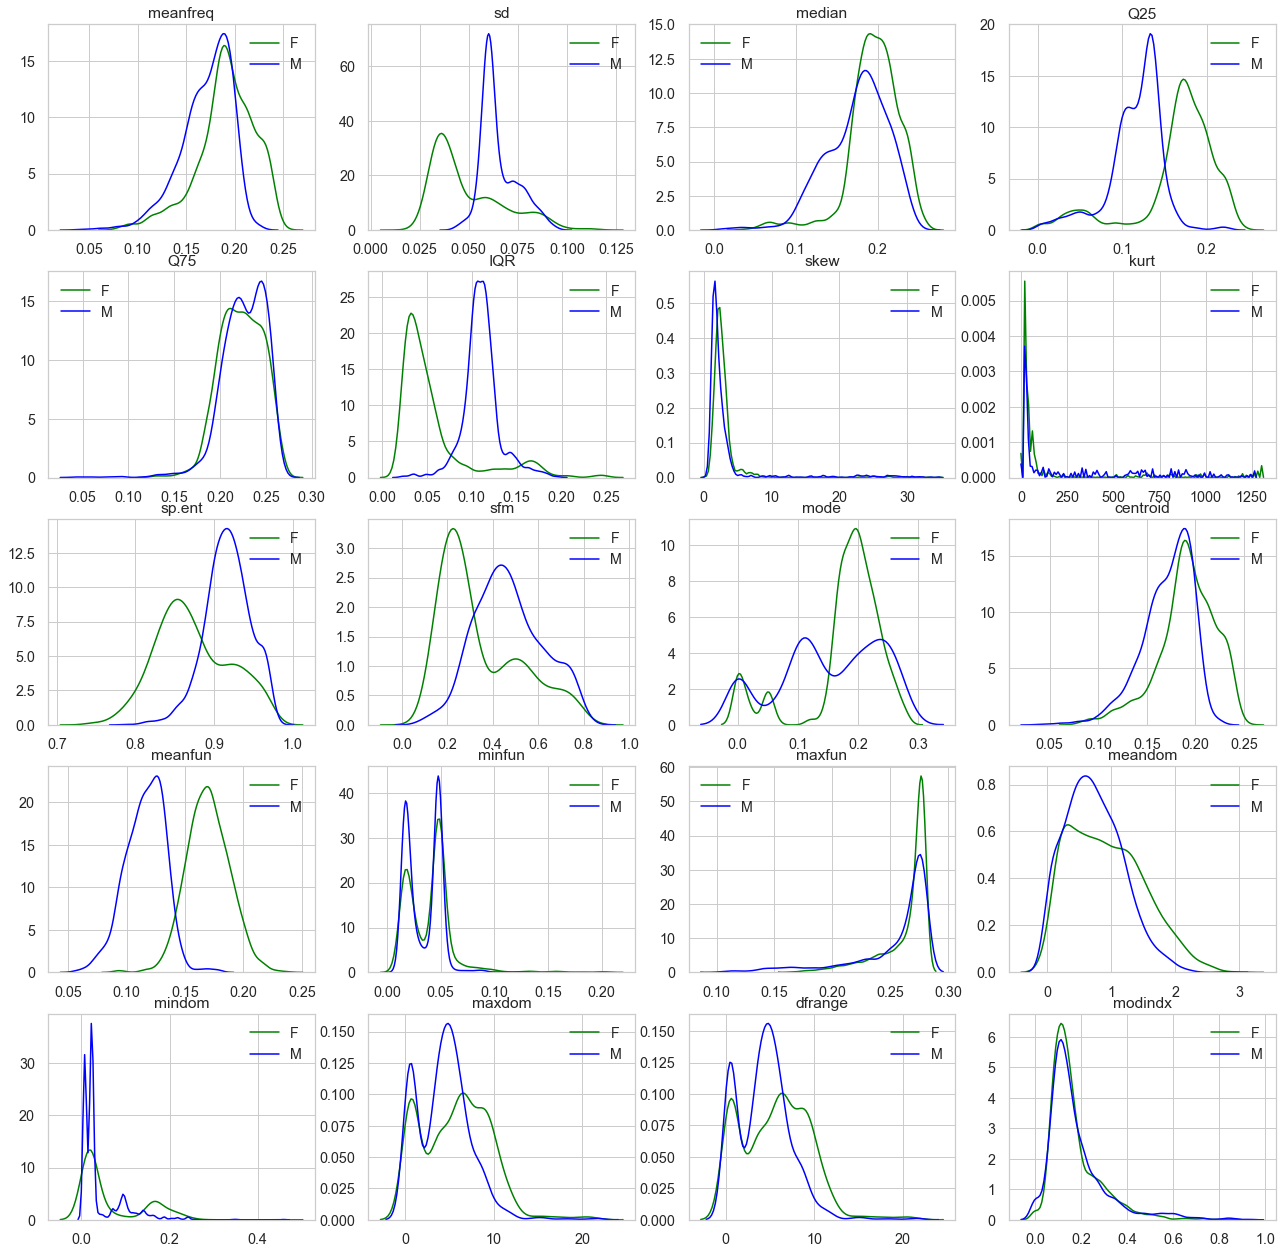

In [33]:
plt.subplots(5,4,figsize=(22,22))
for i in range(1,21):
    plt.subplot(5,4,i)
    plt.title(df1.columns[i-1])
    sns.kdeplot(df1.loc[df1['label'] == 'female', df1.columns[i-1]], color='green', label='F')
    sns.kdeplot(df1.loc[df1['label'] == 'male', df1.columns[i-1]], color='blue', label='M')
    
#Other Method to Plot Individual KDE Plot for a Feature
#sns.FacetGrid(df1, hue="label",size=4).map(sns.kdeplot, "meanfun").add_legend()

#### Scatter Plot between meanfun, sd and IQR Features

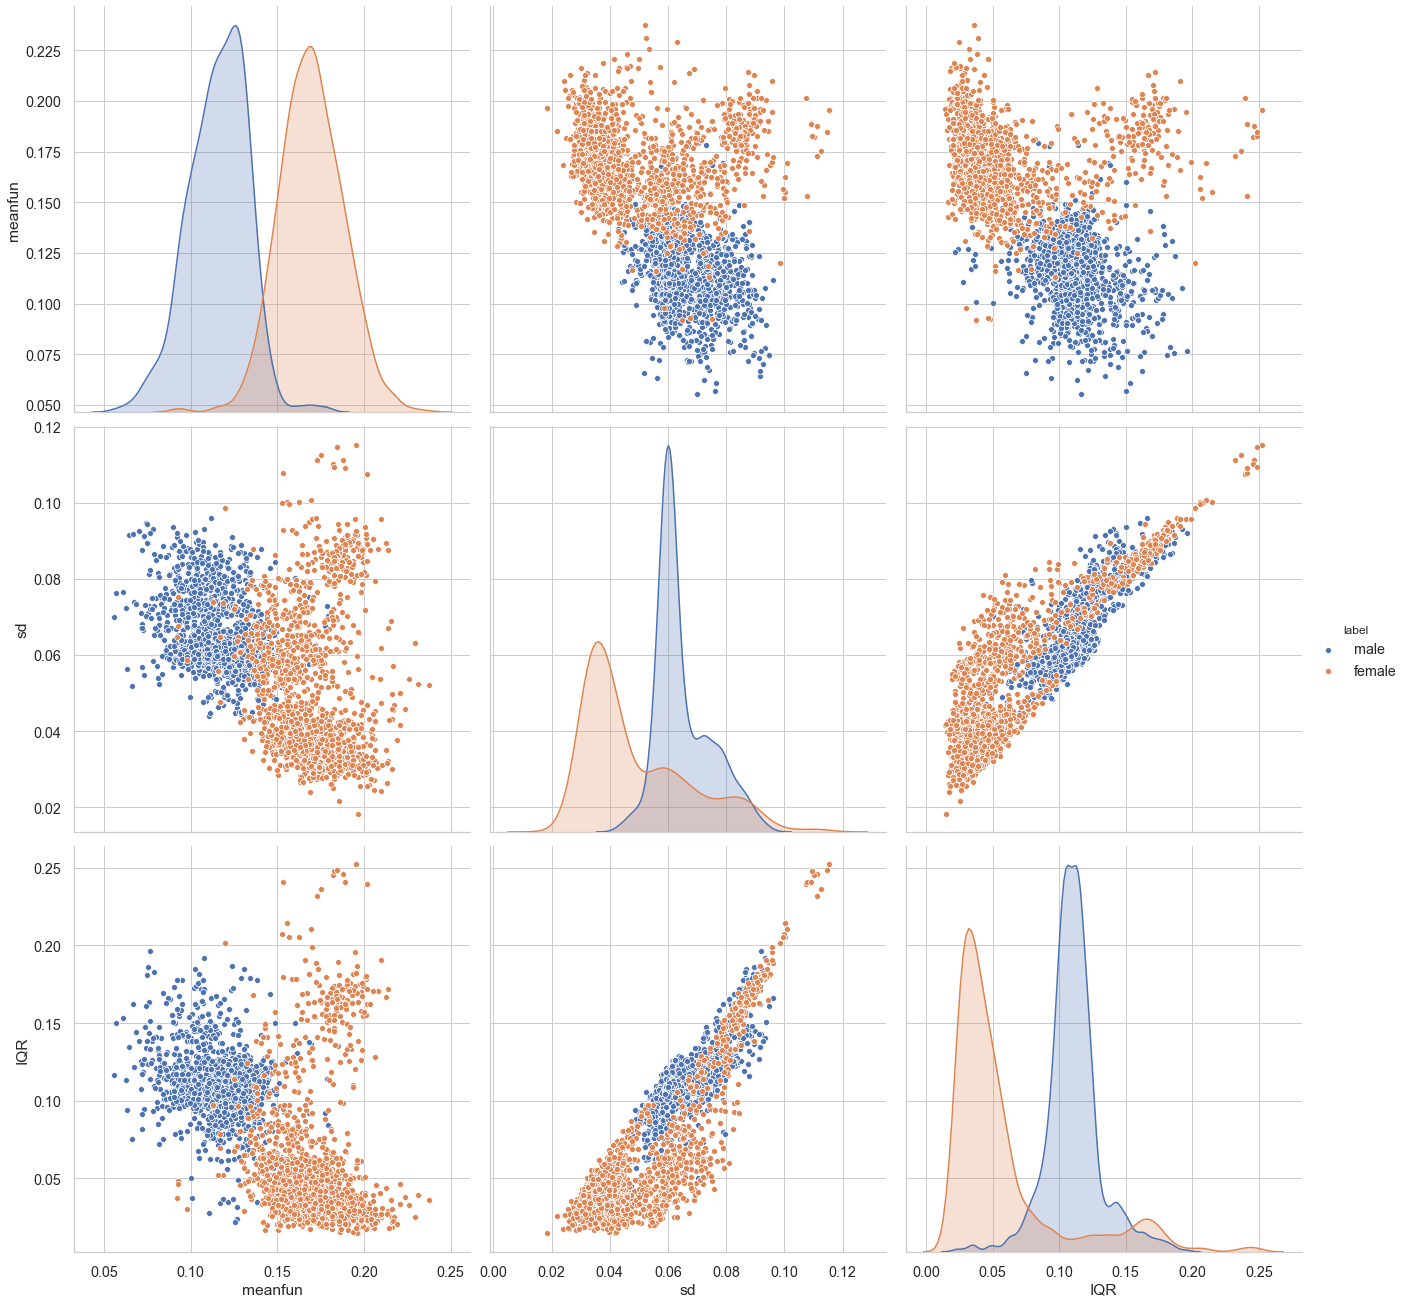

In [34]:
sns.pairplot(df1, vars=['meanfun', 'sd', 'IQR'], hue="label", size=6)

#Other Method to Plot Individual Scatter Plots Between Two Features
#sns.FacetGrid(df1, hue="label", size=5).map(plt.scatter, "meanfun", "IQR").add_legend()

#### Define Function for Plotting BoxPlot & Violin Plot for a Feature against Target Variable

In [35]:
def plot_feature_across_target(df, feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(x='label', y=feature, data=df, ax=axes[0])
    sns.violinplot(x="label", y=feature, data=df, ax=axes[1])
    fig.set_size_inches(15,7)

#### Plotting the Features against the Target Variable

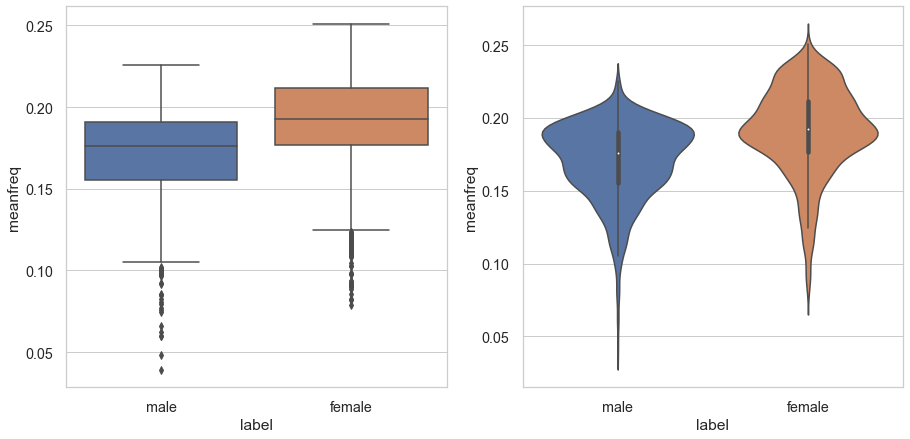

In [36]:
plot_feature_across_target(df1, 'meanfreq')

__Inference :__
- Above BoxPlot & Violin Plot Tells us that Mean Frequency of Females is Higher Compared to Males which is also a generally accepted fact.

##### Similiarly other Features can be Inferenced

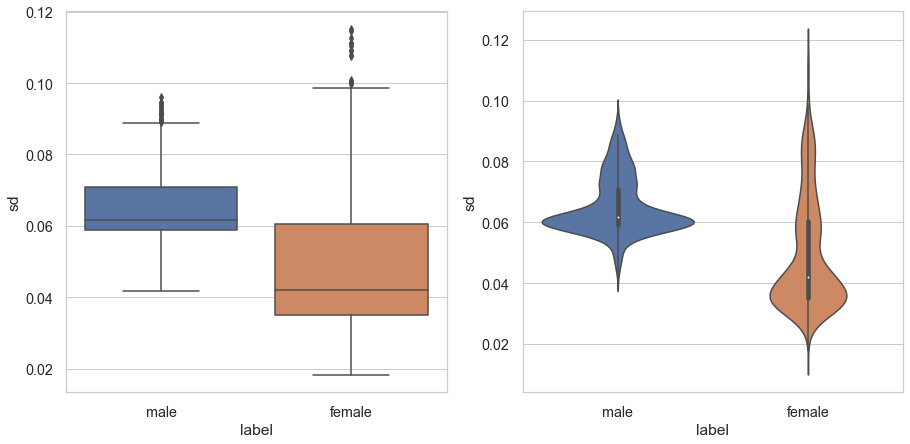

In [37]:
plot_feature_across_target(df1, 'sd')

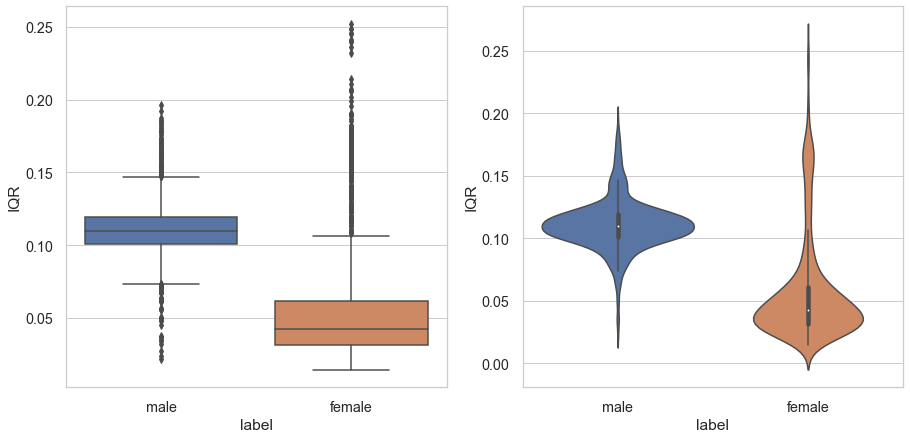

In [38]:
plot_feature_across_target(df1, 'IQR')

<a id=section6></a>

## 6. Feature Engineering

### Label Encoding for Categorical Target Variable

In [39]:
# Do Label Encoding to transform Non-numerical Labels to Numerical Labels
df2 = df1.copy()
encoder = LabelEncoder()
df2['label'] = encoder.fit_transform(df2['label'])

#### Check if Label Encoding is Successful

In [40]:
df2['label'].unique()

array([1, 0])

### Check Correlation

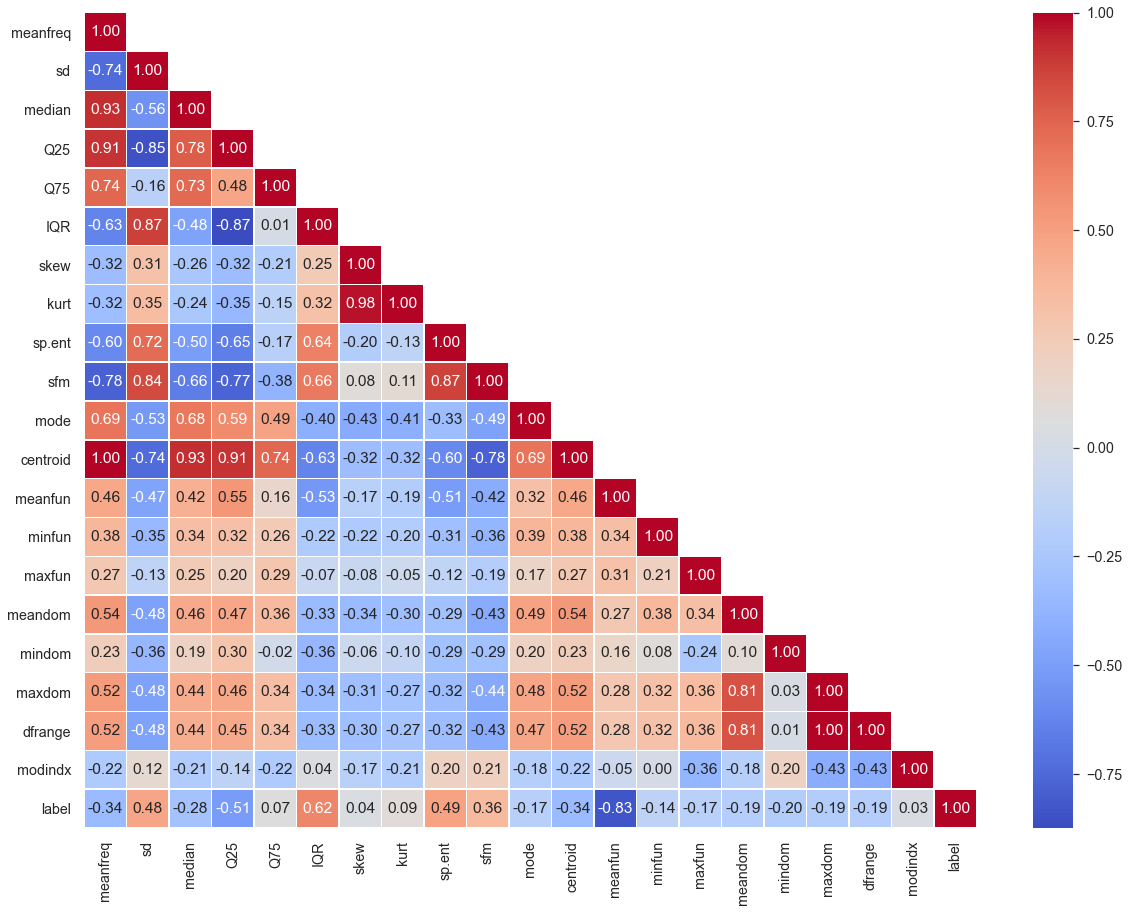

In [41]:
cor_mat = df2.corr()
mask = np.array(cor_mat)
#Mask Upper Triangle of the Matrix
mask[np.tril_indices_from(mask)] = False
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=cor_mat, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', ax=ax)

__Inferences:__
- meanfreq is highly correlated with centroid, median and Q25
- sd is highly correlated with IQR and sfm. sd is highly negatively correlated with Q25
- Q25 is highly negatively correlated with IQR
- skew and kurt are highly correlated
- sp.ent and sfm are highly correlated
- meandom is highly correlated with maxdom and dfrange
- maxdom and dfrange are highly correlated

### Dropping Features

In [42]:
#Drop Highly Correlated Features to Remove Redundancy
df3 = df2.drop(['centroid', 'skew', 'dfrange'], axis=1)

#### Check Shape after Dropping Features

In [43]:
df3.shape

(3166, 18)

### Handling Outliers

In [44]:
df4 = df3.copy()
for col in df4.columns:
    lower, upper = calc_range(df4, col)
    df4 = df4[(df4[col] >= lower) & (df4[col] <= upper)]

In [45]:
df4.shape

(1654, 18)

- We can see size of dataset is substantially reduced after removing outliers

### Prepare X and y for Applying Machine Learning Models

In [46]:
X = df4.loc[:,df4.columns != 'label']
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,8.308895,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,5.987498,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,0.123992
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,4.070284,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,0.148272


In [47]:
y = df4['label']
y.head()

3    1
4    1
5    1
6    1
8    1
Name: label, dtype: int32

### Splitting X and y into training and test datasets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Checking the shape of X and y of train dataset

In [49]:
print(X_train.shape)
print(y_train.shape)

(1323, 17)
(1323,)


#### Checking the shape of X and y of test dataset

In [50]:
print(X_test.shape)
print(y_test.shape)

(331, 17)
(331,)


### Apply Standard Scaling to Numerical Explanatory Variables

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
#Convert ndarray to DataFrame
X_train_s = pd.DataFrame(data = X_train_s, columns = X.columns)
X_test_s = pd.DataFrame(data = X_test_s, columns = X.columns)

<a id=section7></a>

## 7. Model Development & Evaluation

#### Define Function for Applying Model

In [56]:
def classify(model, xtrain, ytrain, xtest):
    clf = model
    clf.fit(xtrain, ytrain)
    pred = clf.predict(xtest)
    return pred

#### Define Function for Displaying Confusion Matrix and Classification Report

In [57]:
def print_reports(ytest, ypred):
    #print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-\n")
    accuracy = accuracy_score(ytest, ypred)
    #print("Accuracy Score: ", accuracy)
    precision = precision_score(ytest, ypred)
    #print("\nPrecision Score: ", precision)
    recall = recall_score(ytest, ypred)
    #print("\nRecall Score: ", recall)
    f1 = f1_score(ytest, ypred)
    #print("\nF1 Score: ", f1)
    print("\n------------------Confusion Matrix------------------\n")
    cm = pd.DataFrame(confusion_matrix(ytest, ypred))
    cm.index = ['Actual Female','Actual Male']
    cm.columns = ['Predicted Female','Predicted Male']
    print(cm)
    print("\n----------------Classification Report----------------\n")
    target_names = ['Female', 'Male']
    print(classification_report(ytest, ypred, target_names=target_names, digits=4))
    
    return (accuracy, precision, recall, f1)

### Instantiating Logistic Regression using scikit learn with default parameters

In [58]:
LogReg = LogisticRegression()
LogReg.fit(X_train_s, y_train)
y_pred_test_LR = LogReg.predict(X_test_s)
LR_accuracy, LR_precision, LR_recall, LR_f1 = print_reports(y_test, y_pred_test_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               160               5
Actual Male                   6             160

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9639    0.9697    0.9668       165
        Male     0.9697    0.9639    0.9668       166

    accuracy                         0.9668       331
   macro avg     0.9668    0.9668    0.9668       331
weighted avg     0.9668    0.9668    0.9668       331



### Instantiating Decision Tree Classifier using scikit learn with default parameters

In [79]:
DT = DecisionTreeClassifier(random_state = 20)
DT.fit(X_train_s, y_train)
y_pred_test_DT = DT.predict(X_test_s)
DT_accuracy, DT_precision, DT_recall, DT_f1 = print_reports(y_test, y_pred_test_DT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               161               4
Actual Male                   6             160

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9641    0.9758    0.9699       165
        Male     0.9756    0.9639    0.9697       166

    accuracy                         0.9698       331
   macro avg     0.9698    0.9698    0.9698       331
weighted avg     0.9699    0.9698    0.9698       331



### Instantiating Random Forest Classification using scikit learn with default parameters

In [62]:
RF = RandomForestClassifier(random_state = 20)
RF.fit(X_train_s, y_train)
y_pred_test_RF = RF.predict(X_test_s)
RF_accuracy, RF_precision, RF_recall, RF_f1 = print_reports(y_test, y_pred_test_RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               161               4
Actual Male                   4             162

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9758    0.9758    0.9758       165
        Male     0.9759    0.9759    0.9759       166

    accuracy                         0.9758       331
   macro avg     0.9758    0.9758    0.9758       331
weighted avg     0.9758    0.9758    0.9758       331



### Instantiating K Nearest Neighbour Classifier using scikit learn with default parameters

In [63]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_s, y_train)
y_pred_test_KNN = KNN.predict(X_test_s)
KNN_accuracy, KNN_precision, KNN_recall, KNN_f1 = print_reports(y_test, y_pred_test_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               161               4
Actual Male                   4             162

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9758    0.9758    0.9758       165
        Male     0.9759    0.9759    0.9759       166

    accuracy                         0.9758       331
   macro avg     0.9758    0.9758    0.9758       331
weighted avg     0.9758    0.9758    0.9758       331



### Instantiating Naive Bayes using scikit learn with default parameters

In [64]:
NB = GaussianNB()
NB.fit(X_train_s, y_train)
y_pred_test_NB = NB.predict(X_test_s)
NB_accuracy, NB_precision, NB_recall, NB_f1 = print_reports(y_test, y_pred_test_NB)

GaussianNB(priors=None, var_smoothing=1e-09)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               160               5
Actual Male                   5             161

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9697    0.9697    0.9697       165
        Male     0.9699    0.9699    0.9699       166

    accuracy                         0.9698       331
   macro avg     0.9698    0.9698    0.9698       331
weighted avg     0.9698    0.9698    0.9698       331



### Instantiating SVM using scikit learn with default hyperparameter

In [65]:
svc = SVC()
svc.fit(X_train_s, y_train)
y_pred_test_svc = svc.predict(X_test_s)
svc_accuracy, svc_precision, svc_recall, svc_f1 = print_reports(y_test, y_pred_test_svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               164               1
Actual Male                   3             163

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9820    0.9939    0.9880       165
        Male     0.9939    0.9819    0.9879       166

    accuracy                         0.9879       331
   macro avg     0.9880    0.9879    0.9879       331
weighted avg     0.9880    0.9879    0.9879       331



### Instantiating SVM using scikit learn with default linear kernel

In [66]:
svc_l = SVC(kernel='linear')
svc_l.fit(X_train_s, y_train)
y_pred_test_svc_l = svc_l.predict(X_test_s)
svc_l_accuracy, svc_l_precision, svc_l_recall, svc_l_f1 = print_reports(y_test, y_pred_test_svc_l)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               160               5
Actual Male                   6             160

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9639    0.9697    0.9668       165
        Male     0.9697    0.9639    0.9668       166

    accuracy                         0.9668       331
   macro avg     0.9668    0.9668    0.9668       331
weighted avg     0.9668    0.9668    0.9668       331



### Instantiating SVM using scikit learn with default polynomial  kernel

In [67]:
svc_p = SVC(kernel='poly')
svc_p.fit(X_train_s, y_train)
y_pred_test_svc_p = svc_p.predict(X_test_s)
svc_p_accuracy, svc_p_precision, svc_p_recall, svc_p_f1 = print_reports(y_test, y_pred_test_svc_p)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               155              10
Actual Male                   3             163

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9810    0.9394    0.9598       165
        Male     0.9422    0.9819    0.9617       166

    accuracy                         0.9607       331
   macro avg     0.9616    0.9607    0.9607       331
weighted avg     0.9615    0.9607    0.9607       331



### Instantiating SVM using scikit learn with default rbf  kernel

In [68]:
svc_r = SVC(kernel='rbf')
svc_r.fit(X_train_s, y_train)
y_pred_test_svc_r = svc_r.predict(X_test_s)
svc_r_accuracy, svc_r_precision, svc_r_recall, svc_r_f1 = print_reports(y_test, y_pred_test_svc_r)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               164               1
Actual Male                   3             163

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9820    0.9939    0.9880       165
        Male     0.9939    0.9819    0.9879       166

    accuracy                         0.9879       331
   macro avg     0.9880    0.9879    0.9879       331
weighted avg     0.9880    0.9879    0.9879       331



### Using GridSearch Technique with Decision Tree to find best best parameters

In [76]:
dt_tuned_parameters = { 'criterion':['gini','entropy'],
                        'max_depth':range(2,60),
                        'max_features':['sqrt', 'log2', None]
                      }

DT_gs = GridSearchCV(DecisionTreeClassifier(), dt_tuned_parameters, cv=10, scoring='accuracy')

In [77]:
DT_gs.fit(X_train_s, y_train)
print(DT_gs.best_score_)
print(DT_gs.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

0.9765550239234451
{'criterion': 'entropy', 'max_depth': 37, 'max_features': None}


In [80]:
y_pred_test_DT_gs = DT_gs.predict(X_test_s)
DT_gs_accuracy, DT_gs_precision, DT_gs_recall, DT_gs_f1 = print_reports(y_test, y_pred_test_DT_gs)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               163               2
Actual Male                   6             160

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9645    0.9879    0.9760       165
        Male     0.9877    0.9639    0.9756       166

    accuracy                         0.9758       331
   macro avg     0.9761    0.9759    0.9758       331
weighted avg     0.9761    0.9758    0.9758       331



### Using GridSearch Technique with SVC to find best best parameters

In [73]:
svm_tuned_parameters = { 'C':range(1,11),
                         'gamma':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
                         'kernel':['linear','rbf']
                       }

svc_gs = GridSearchCV(SVC(), svm_tuned_parameters, cv=10, scoring='accuracy')

In [74]:
svc_gs.fit(X_train_s, y_train)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': range(1, 11),
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

0.9856516290726816
{'C': 8, 'gamma': 0.04, 'kernel': 'rbf'}


In [75]:
y_pred_test_svc_gs = svc_gs.predict(X_test_s)
svc_gs_accuracy, svc_gs_precision, svc_gs_recall, svc_gs_f1 = print_reports(y_test, y_pred_test_svc_gs)


------------------Confusion Matrix------------------

               Predicted Female  Predicted Male
Actual Female               165               0
Actual Male                   3             163

----------------Classification Report----------------

              precision    recall  f1-score   support

      Female     0.9821    1.0000    0.9910       165
        Male     1.0000    0.9819    0.9909       166

    accuracy                         0.9909       331
   macro avg     0.9911    0.9910    0.9909       331
weighted avg     0.9911    0.9909    0.9909       331



<a id=section8></a>

## 8. Model Comparison

In [126]:
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNearestNeighbors', 'GaussianNB',
               'SVC', 'linearSVC', 'polySVC', 'rbfSVC', 'GridSearchDecisionTree', 'GridSearchSVC']

model_accuracy = [LR_accuracy, DT_accuracy, RF_accuracy, KNN_accuracy, NB_accuracy, svc_accuracy, svc_l_accuracy,
                  svc_p_accuracy, svc_r_accuracy, DT_gs_accuracy, svc_gs_accuracy]

model_precision = [LR_precision, DT_precision, RF_precision, KNN_precision, NB_precision, svc_precision, svc_l_precision,
                  svc_p_precision, svc_r_precision, DT_gs_precision, svc_gs_precision]

model_recall = [LR_recall, DT_recall, RF_recall, KNN_recall, NB_recall, svc_recall, svc_l_recall, svc_p_recall, svc_r_recall,
                DT_gs_recall, svc_gs_recall]

model_f1 = [LR_f1, DT_f1, RF_f1, KNN_f1, NB_f1, svc_f1, svc_l_f1, svc_p_f1, svc_r_f1, DT_gs_f1, svc_gs_f1]

scores_dict = {'Model':model_names, 'Accuracy':model_accuracy, 'F1':model_f1, 'Precision':model_precision,
                 'Recall':model_recall}

scores_df = pd.DataFrame(scores_dict)
scores_df

,Model,Accuracy,F1,Precision,Recall
0,LogisticRegression,0.966767,0.966767,0.969697,0.963855
1,DecisionTreeClassifier,0.969789,0.969697,0.975610,0.963855
2,RandomForestClassifier,0.975831,0.975904,0.975904,0.975904
3,KNearestNeighbors,0.975831,0.975904,0.975904,0.975904
4,GaussianNB,0.969789,0.969880,0.969880,0.969880
5,SVC,0.987915,0.987879,0.993902,0.981928
6,linearSVC,0.966767,0.966767,0.969697,0.963855
7,polySVC,0.960725,0.961652,0.942197,0.981928
8,rbfSVC,0.987915,0.987879,0.993902,0.981928
9,GridSearchDecisionTree,0.975831,0.975610,0.987654,0.963855


[Text(0, 0.5, 'Model'), (0.95, 1.0), Text(0.5, 0, 'Accuracy')]

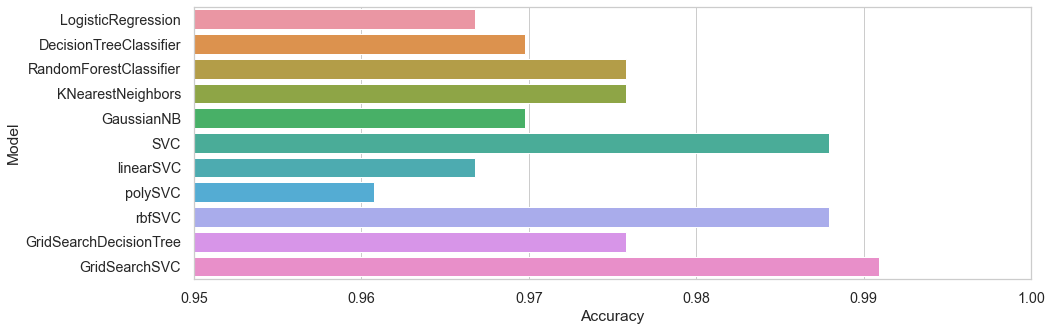

In [127]:
f, ax = plt.subplots(figsize=(15, 5))
ax.set(xlim=(0.95, 1), xlabel="Accuracy", ylabel="Model")
sns.barplot(x='Accuracy', y='Model', data=scores_df)

<a id=section9></a>

## 9. Conclusion

- We removed duplicated samples from the dataset
- We removed **redundant features** (**centroid, skew & dfrange**) due to very high correlation.
- We did treatment for outliers and removed the same using range as **1.5 * IQR**
- We **developed different Machine Learning Algorithms i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbors, Naive Bayes and Support Vector Classifier.**
- **Support Vector Classifier with GridSearch** outperformed all the models achieving __99.1%__ accuracy score and perfect __100%__ precision score.